# 비트코인 차트데이터 연습

In [14]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [8]:
file_path = './data/market-price.csv'
bitcoin_df = pd.read_csv(file_path, names = ['day', 'price'])
bitcoin_df

,day,price
0,2017-08-27 00:00:00,4354.308333
1,2017-08-28 00:00:00,4391.673517
2,2017-08-29 00:00:00,4607.985450
3,2017-08-30 00:00:00,4594.987850
4,2017-08-31 00:00:00,4748.255000
...,...,...
360,2018-08-22 00:00:00,6575.229167
361,2018-08-23 00:00:00,6434.881667
362,2018-08-24 00:00:00,6543.645714
363,2018-08-25 00:00:00,6719.429231


In [9]:
# day는 단위가 하루이기에, 시계열 피처단위로 바꾼다.
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])
bitcoin_df

,day,price
0,2017-08-27,4354.308333
1,2017-08-28,4391.673517
2,2017-08-29,4607.985450
3,2017-08-30,4594.987850
4,2017-08-31,4748.255000
...,...,...
360,2018-08-22,6575.229167
361,2018-08-23,6434.881667
362,2018-08-24,6543.645714
363,2018-08-25,6719.429231


In [10]:
# day를 index로 지정
bitcoin_df.index = bitcoin_df['day']
bitcoin_df.set_index('day', inplace=True)

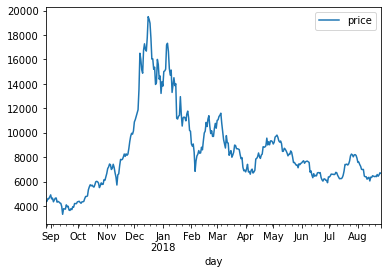

In [13]:
bitcoin_df.plot()
plt.show()

In [15]:
# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(bitcoin_df.price.values, order=(2,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

C:\Users\wonnaekang\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2780.085
Method:                       css-mle   S.D. of innovations            500.610
Date:                Mon, 28 Dec 2020   AIC                           5572.170
Time:                        15:18:28   BIC                           5595.553
Sample:                             1   HQIC                          5581.464
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4121     27.571      0.233      0.816     -47.625      60.449
ar.L1.D.y     -1.7421      0.031    -55.640      0.000      -1.803      -1.681
ar.L2.D.y     -0.9015      0.030    -29.872      0.0

C:\Users\wonnaekang\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
